In [1]:
import numpy as np
from matplotlib import pyplot as plt
import shapely
from shapely.geometry import LineString
import random
from mpl_toolkits import mplot3d


from lattice_generator import LatticeGenerator
from planning_utils import sample_trajectory, get_x_y_v_trajectory

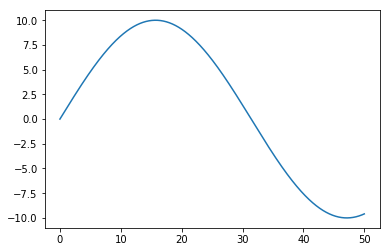

In [2]:
x = np.arange(0, 50, 0.01)
y = 10*np.sin(x/10)
plt.plot(x,y)

theta = np.gradient(y, 0.01)
linestring = LineString(zip(x,y))

In [10]:
latticeGenerator = LatticeGenerator(linestring)
s_l_lattice = latticeGenerator.generate_s_l_lattice(1, linestring.length, 5)

<IPython.core.display.Javascript object>


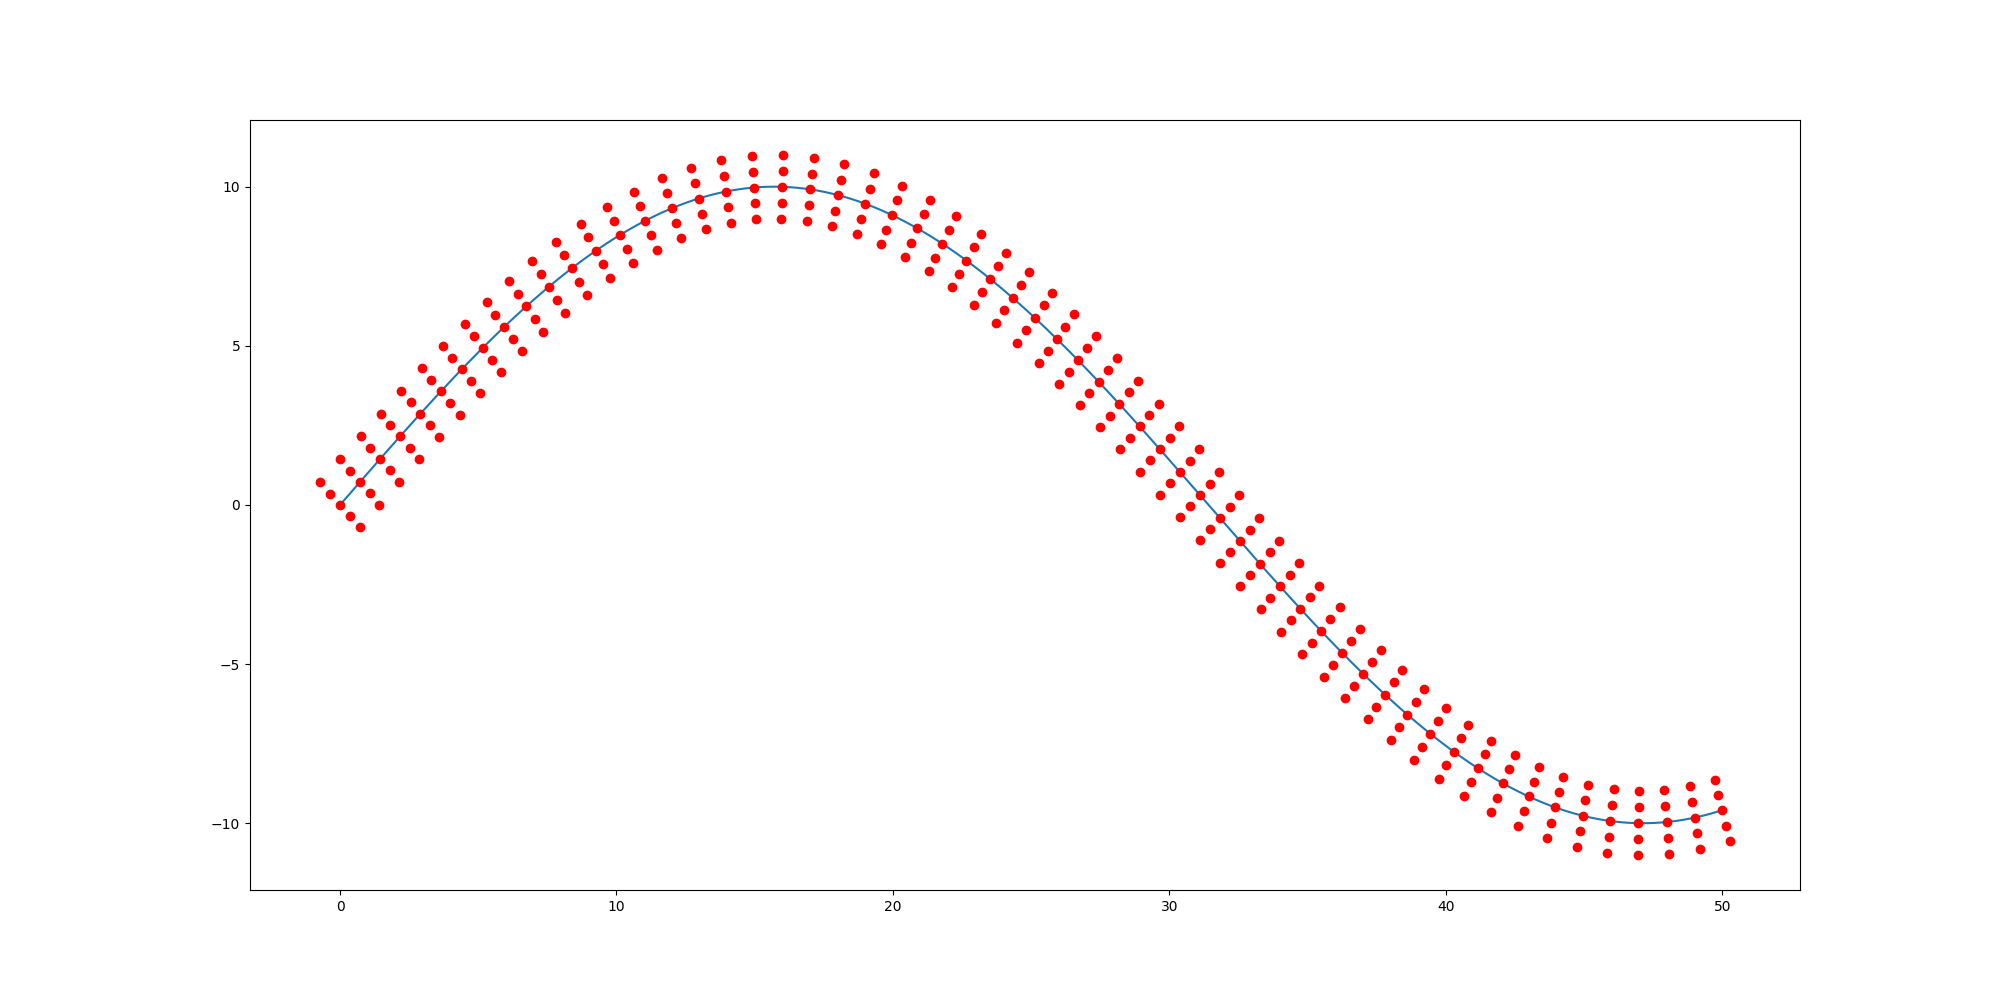

In [11]:
plt.figure(figsize=(20,10))
plt.plot(x,y)

for k in range(len(s_l_lattice)):
    for i in range(len(s_l_lattice[k][0])):
        plt.plot(s_l_lattice[k][0][i], s_l_lattice[k][1][i], 'or')

<IPython.core.display.Javascript object>


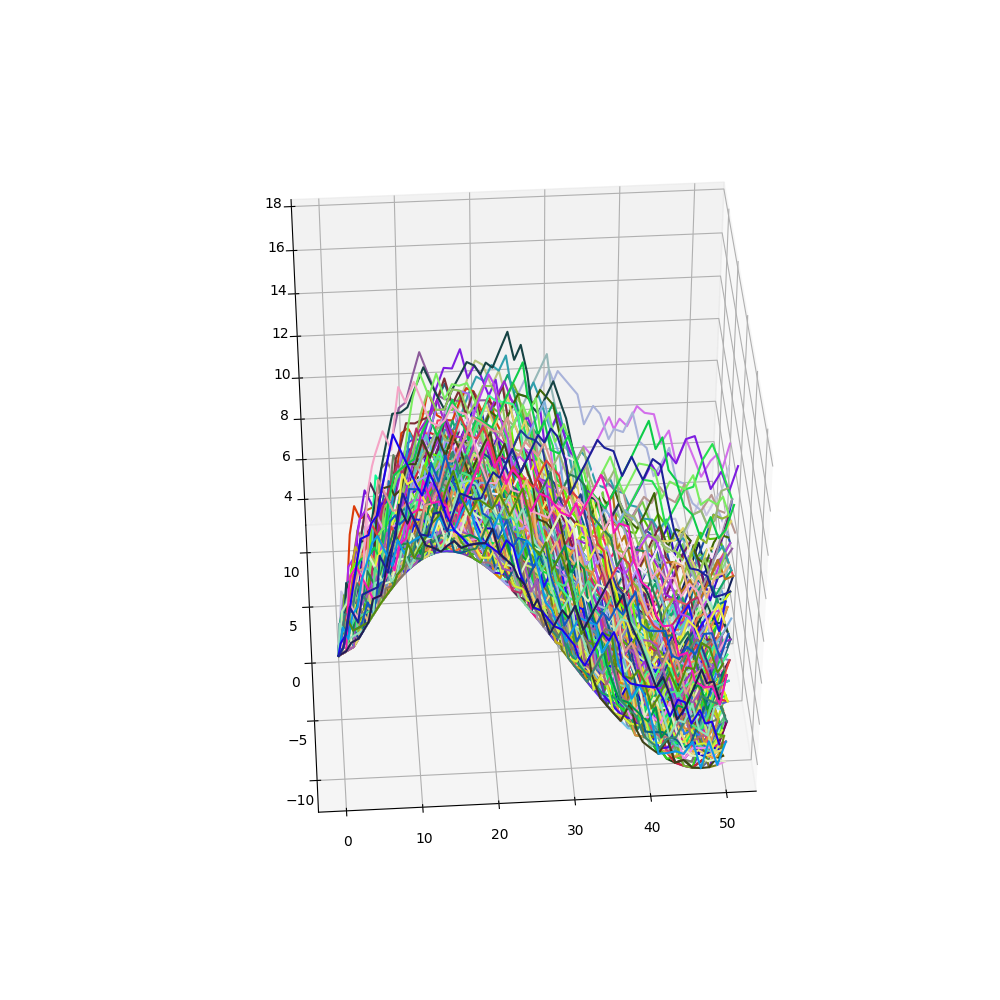

In [7]:
%matplotlib notebook
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')

for i in range(200):
    traj_x, traj_y, traj_v = get_x_y_v_trajectory(sample_trajectory(max_v=18), s_l_lattice)
    ax.plot3D(traj_x, traj_y, traj_v, c=np.random.rand(3,))


In [249]:
curvature_list = []
theta_list = []
comp_curv = ComputeCurvature()
for i in range(3, len(x)-3):
    curvature = comp_curv.fit(x[i-3:i+3], y[i-3:i+3])
    curvature_list.append(curvature)
    
    
x = x[3:len(x)-3]
y = y[3:len(y)-3]
theta = theta[3:len(theta)-3]

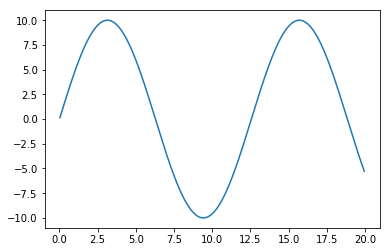

In [251]:
plt.plot(x,y)

In [257]:
i = 10
centerline = [x[i], y[i], x[i], curvature_list[i]]
new_state = get_state(2, centerline)

In [258]:
centerline, new_state

([0.1, 0.04997916927067833, 0.1, 0.0011845288222846174],
 [2.0900083305560515, 0.24964600256433464, 0.1, 0.001181729237600469])

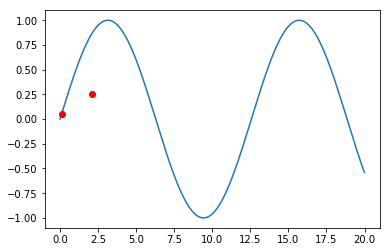

In [259]:
x = np.arange(0, 20, 0.01)
y = np.sin(x/2)
plt.plot(x,y)
plt.plot(centerline[0], centerline[1], 'or')
plt.plot(new_state[0], new_state[1], 'or')


In [256]:
def get_state(l,centerline):
    
    x = centerline[0] + l * np.cos(centerline[2])
    y = centerline[1] + l * np.sin(centerline[2])
    theta = centerline[2]
    k = 1 / (1/centerline[3] + l)
    
    return [x,y,theta,k]